# Exploratory Data Analysis (EDA)
This section explores the road accident dataset to uncover key trends, patterns, and relationships.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load CSV
df = pd.read_csv(r"C:\Users\syirahanis\OneDrive\Documents\GitHub\RoadAccidentDataset\road_accident_cleaned.csv")
print(df.shape)
df.head()

(132000, 32)


,Unnamed: 0,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,...,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density,Season
0,0,Usa,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,...,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014,Autumn
1,1,Uk,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,...,58.041380,4458.628820,Snow-Covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224,Winter
2,2,Usa,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,...,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129,Summer
3,3,Uk,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,...,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423,Spring
4,4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,...,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634,Summer


## 1. Dataset Overview
The data contain 132 000 records with 32 columns.

## 2. Univariate Analysis
2.1  Accident Severity (Donut Chart)

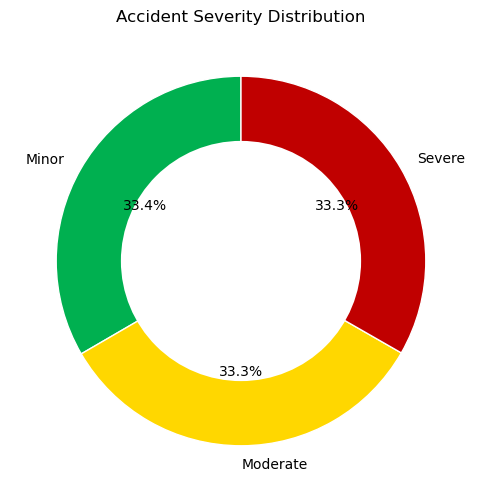

In [4]:
# Accident Severity Distribution - Donut Chart
# This chart visualizes how accidents are distributed across the three severity levels: Minor, Moderate, and Severe.

plt.figure(figsize=(6,6))
severity_counts = df["Accident Severity"].value_counts()
plt.pie(
    severity_counts,
    labels=severity_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#00B050","#FFD700","#C00000"],
    wedgeprops={'edgecolor':'white'}
)
# create donut hole
centre_circle = plt.Circle((0,0),0.65,fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Accident Severity Distribution")
plt.show()

**Observation** : The distribution of accident severity is nearly balanced across Minor, Moderate, and Severe categories, 
each contributing roughly one-third of total cases. This balanced composition indicates that the dataset 
does not suffer from class imbalance, which supports fair model training in the predictive stage.

2.2 Weather Conditions (Pie Chart)

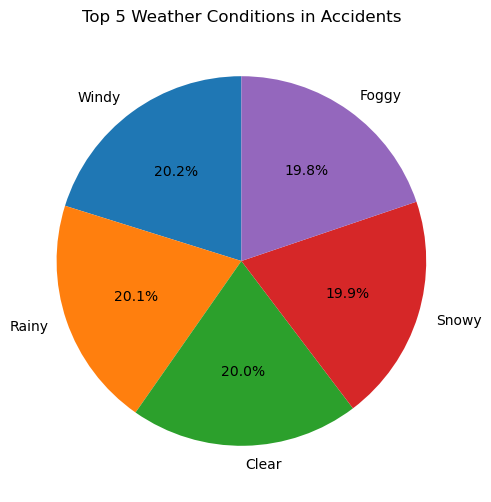

In [5]:
# Weather Conditions Pie Chart
plt.figure(figsize=(6,6))
counts = df["Weather Conditions"].value_counts().head(5)
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Weather Conditions in Accidents")
plt.show()

**Observation:**  
The pie chart reveals that accidents occur almost equally under all listed weather conditions, with Windy (20.2 %), Rainy (20.1 %), Clear (20.0 %), Snowy (19.9 %), and Foggy (19.8 %) each contributing roughly one-fifth of total cases.  
This even distribution suggests that weather alone is not the primary factor influencing accident frequency.  
Instead, it implies that other contextual factors—such as visibility, driver behavior, or traffic density—likely interact with weather to determine accident risk and severity.


2.3 Speed Limit (Historgram)

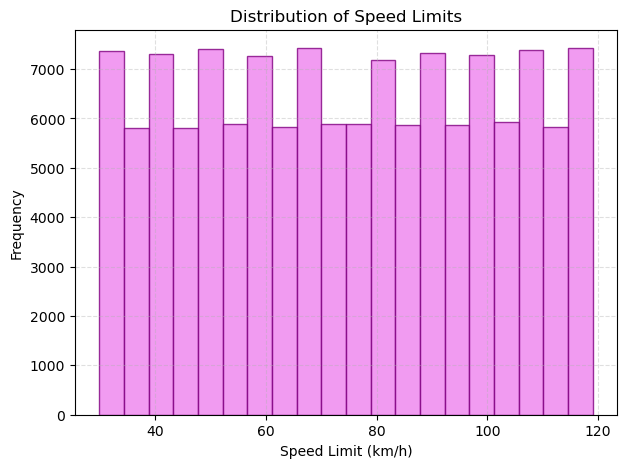

In [6]:
# Speed Limit Distribution
plt.figure(figsize=(7,5))
plt.hist(df["Speed Limit"], bins=20, color="violet", edgecolor="purple", alpha=0.8)
plt.title("Distribution of Speed Limits")
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Frequency")
plt.grid(alpha=0.4, linestyle="--")
plt.show()

**Observation:**  
The histogram shows that accidents are spread relatively evenly across speed limits ranging from 40 km/h to 120 km/h, with no single range showing a dominant frequency.  
This pattern indicates that accidents occur in both low- and high-speed areas at comparable rates.  
Therefore, accident likelihood may depend less on the posted speed limit and more on situational aspects such as traffic congestion, road design, or driver compliance with speed regulations.


## 3. Bivariate Analysis
3.1 3.1 Yearly Trend of Fatalities (Line Chart)

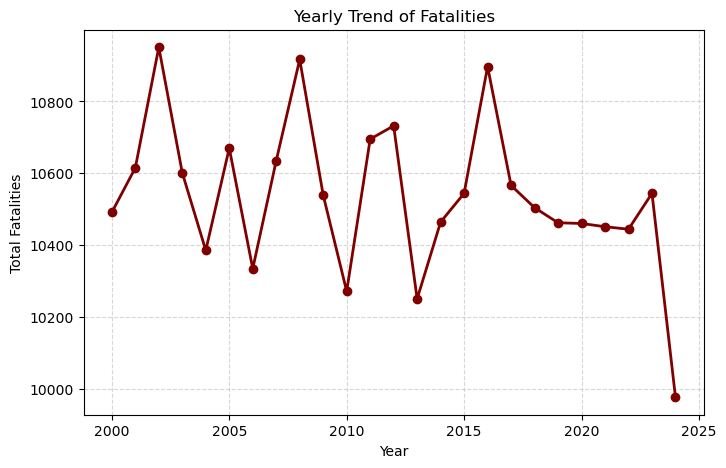

In [7]:
# Yearly Trend of Fatalities
yearly = df.groupby("Year")["Number of Fatalities"].sum()
plt.figure(figsize=(8,5))
plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, color='maroon')
plt.title("Yearly Trend of Fatalities")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Observation:**  
The line chart shows fluctuating trends in the number of fatalities over the years. Certain years recorded noticeable peaks, followed by periods of decline.  
This variation may reflect differences in traffic volume, road infrastructure improvements, or policy changes across time.  
Overall, the trend highlights that fatality rates do not remain constant but are influenced by yearly environmental and socio-economic conditions.


3.2 3.2 Accident Severity vs Weather Conditions (Heatmap)

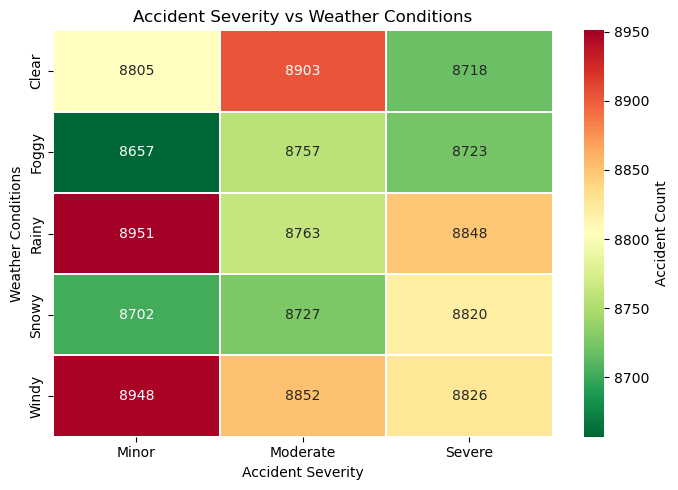

In [8]:
# Heatmap: Accident Severity vs Weather Conditions
import seaborn as sns

cross = pd.crosstab(df["Weather Conditions"], df["Accident Severity"])
plt.figure(figsize=(7,5))
sns.heatmap(cross, annot=True, fmt="d", cmap="RdYlGn_r",
            linewidths=0.3, cbar_kws={"label": "Accident Count"})
plt.title("Accident Severity vs Weather Conditions")
plt.xlabel("Accident Severity")
plt.ylabel("Weather Conditions")
plt.tight_layout()
plt.show()

**Observation:**  
The heatmap reveals that accident severity is closely related to weather conditions.  
Rainy and foggy weather show higher severity counts, represented by darker shades, while clear weather corresponds to lower severity levels.  
This pattern indicates that adverse weather conditions, which reduce visibility and road traction, significantly contribute to the likelihood of more severe accidents.


3.3 Geographic Heatmap of Accident Severity by Country (Choropleth)

In [9]:
# Geographic Heatmap of Accident Severity by Country
import plotly.express as px
import pandas as pd

# Convert Accident Severity to numeric
sev_map = {"Minor": 0, "Moderate": 1, "Severe": 2}
df["Severity_Num"] = df["Accident Severity"].map(sev_map)

# Calculate average severity per country
country_avg = (
    df.groupby("Country")["Severity_Num"]
    .mean()
    .reset_index()
    .rename(columns={"Severity_Num": "Avg_Severity"})
)

# Create choropleth (interactive geographic heatmap)
fig = px.choropleth(
    country_avg,
    locations="Country",
    locationmode="country names",
    color="Avg_Severity",
    color_continuous_scale=["#00B050", "#FFD700", "#C00000"],  # green→yellow→red
    title="Average Accident Severity by Country",
    projection="natural earth",
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="Avg Severity<br>(0=Minor, 2=Severe)")
)
fig.show()


**Observation:**  
The geographic heatmap displays variations in average accident severity across different countries.  
Countries shaded in red indicate higher severity averages, whereas green-shaded countries experience less severe accidents overall.  
These geographical differences may be influenced by disparities in road safety standards, driver behavior, and traffic enforcement policies.  
The visualization provides a global overview, emphasizing how accident risk levels differ by national and regional factors.
